<a href="https://colab.research.google.com/github/tsubauaaa/Tensorflow2.0-tutorials/blob/master/Tensorflow2_beginning_of_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 380.5MB 70kB/s 
     |████████████████████████████████| 501kB 50.1MB/s 
     |████████████████████████████████| 4.3MB 39.3MB/s 
2.0.0-rc1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

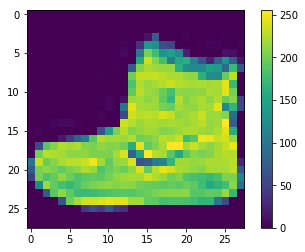

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

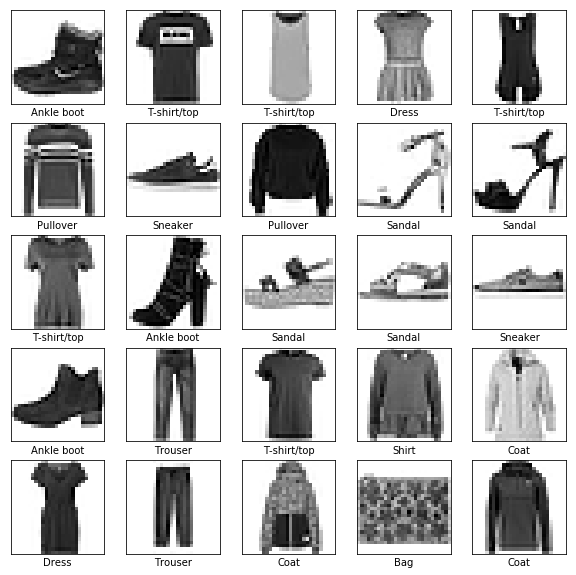

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5007 - accuracy: 0.8250
Epoch 2/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3750 - accuracy: 0.8631
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3355 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3123 - accuracy: 0.8836
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2953 - accuracy: 0.8918


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([2.2317631e-06, 8.2083304e-08, 2.9311238e-07, 7.1900040e-08,
       7.1997653e-07, 8.0243172e-03, 4.4765175e-06, 5.8337424e-02,
       7.0512401e-06, 9.3362337e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ( {} )".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

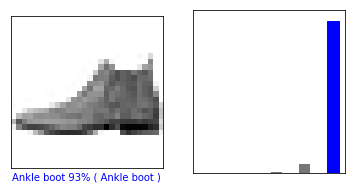

In [32]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

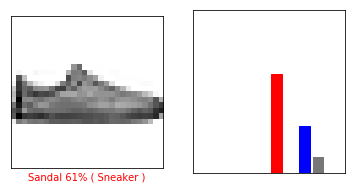

In [33]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

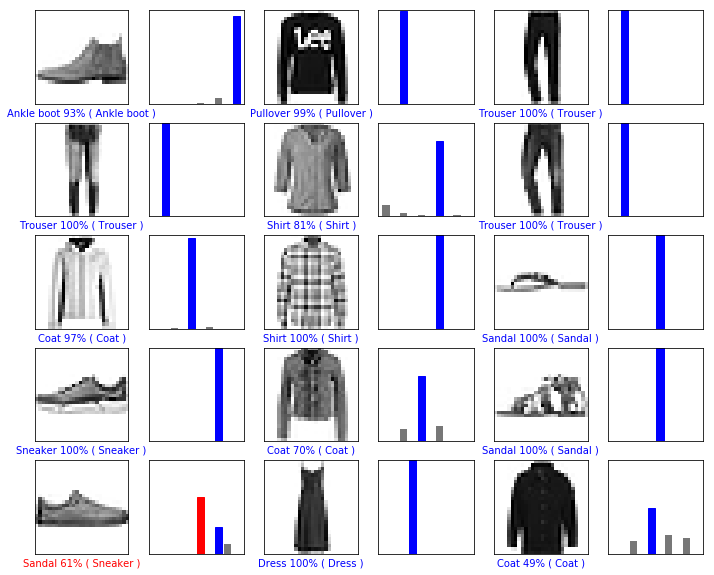

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [35]:
img = test_images[0]

print(img.shape)

(28, 28)


In [36]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.2317654e-06 8.2083616e-08 2.9311263e-07 7.1900040e-08 7.1997721e-07
  8.0243172e-03 4.4765175e-06 5.8337424e-02 7.0512538e-06 9.3362337e-01]]


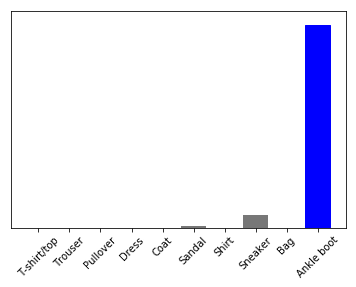

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
prediction = predictions[0]

np.argmax(prediction)

9